# REGRESION LINEAL MULTIPLE
### USANDO EL PAQUETE STATSMODEL PARA REGRESION MULTIPLE
* Sales ~ TV
* Sales ~ Newspaper
* Sales ~ Radio
* Sales ~ TV+Newspaper
* Sales ~ TV+Radio
* Sales ~ Newspaper+Radio
* Sales ~ TV+Newspaper+Radio
Son 7 modelos en total que obtendremos, elimanos variables con p-valor alto
* Podemos comenzar con un modelo vacio e ir añadiendo variables predictoras
* O podemos comenzar con un enfoque hacia atras con todos los posibles modelos y se va descartando una por una
* partiremos del modelo que ya tenemos e ir agregando variables a ver si aumenta la eficacia

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd

In [2]:
data = pd.read_csv('Advertising.csv')

In [4]:
lm1 = smf.ols(formula='Sales~TV',data=data).fit()

In [6]:
#Añadir el newspaper al modelo inicial
lm2 = smf.ols(formula='Sales~TV+Newspaper',data=data).fit()

In [10]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [11]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [12]:
lm2.rsquared

0.6458354938293271

In [13]:
lm2.rsquared_adj

0.6422399150864777

In [14]:
Sales_pred = lm2.predict(data[['TV','Newspaper']])

In [15]:
Sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [17]:
SSD = sum((data['Sales']-Sales_pred)**2)
SSD

1918.561811896827

In [18]:
RSE = np.sqrt(SSD/(len(data['Sales'])-3))
RSE

3.120719860252885

In [19]:
sales_m = np.mean(data['Sales'])
sales_m

14.022500000000003

In [21]:
error = (RSE/sales_m)*100
error

22.255089037282115

In [22]:
# Añadir el Newspaper al modelo original no aporto en nada, vario muy poco

## se agregara ahora la radio

In [23]:
lm3 = smf.ols(formula='Sales~TV+Radio',data=data).fit()

In [24]:
lm3.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [25]:
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [26]:
Sales_pred2 = lm3.predict(data[['TV','Radio']])
Sales_pred2

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [27]:
SSD_2 = sum((data['Sales']-Sales_pred2)**2)
SSD_2

556.9139800676182

In [28]:
RSE_2 = np.sqrt(SSD_2/(len(data['Sales'])-3))
RSE_2

1.681360912508001

In [34]:
error2 = (RSE_2/sales_m)*100
error2

11.990450436855058

In [30]:
lm4 = smf.ols(formula='Sales~TV+Radio+Newspaper',data=data).fit()
lm4.summary() #newspaper coje el 0 en el intervalo de confianza y el p-valor es casi 1, muy alto
# el newspaper le resta al modelo va en contra

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           1.58e-96
Time:                        23:35:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
Sales_pred3 = lm4.predict(data[['TV','Radio','Newspaper']])

In [32]:
SSD_3 = sum((data['Sales']-Sales_pred3)**2)
SSD_3

556.8252629021874

In [33]:
RSE_3 = np.sqrt(SSD_3/(len(data['Sales'])-4))
RSE_3

1.6855103734147445

In [35]:
error3 = (RSE_3/sales_m)*100
error3 # 

12.020041885646242

hay alguna teoria para decir que si incluyo el periodico, empeoro el modelo?

## MULTICOLINEALIDAD

In [37]:
#calculo del factor de inflacion de la varianza
#escribir la variable que da problema en funcion de las otras variables predictoras
#en nuestro caso parece se que nos da problema
# Newspaper en relacion a TV + Radio

#### Factor de inflacion de la varianza
* VIF = 1 : las variables no estan correlacionadas
* VIF < 5 : las variables tienen una correlacion moderada y se pueden quedar en el modelo
* VIF > 5 : las variables estan altamente correlacionadas y deben desaparecen del modelo

In [39]:
# Newspaper ~ TV + Radio -> R^2  VIF = 1/(1-R^2)
lm_n =  smf.ols(formula='Newspaper~TV+Radio',data=data).fit()
rsquared_n = lm_n.rsquared
VIF_n = 1/(1-rsquared_n)
VIF_n

1.1451873787239288

In [40]:
# TV ~ Newspaper + Radio -> R^2  VIF = 1/(1-R^2)
lm_tv = smf.ols(formula='TV~Newspaper+Radio',data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF_tv = 1/(1-rsquared_tv)
VIF_tv

1.0046107849396502

In [41]:
# Radio ~ TV + Newspaper -> R^2  VIF = 1/(1-R^2)
lm_r = smf.ols(formula='Radio~TV+Newspaper',data=data).fit()
rsquared_r = lm_r.rsquared
VIF_r = 1/(1-rsquared_r)
VIF_r

1.1449519171055353

# VALIDANDO EL MODELO

### Dividir el dataset en un conjunto de entrenamiento y de testing

In [42]:
a = np.random.randn(len(data))

(array([ 7.,  7., 22., 37., 38., 41., 30., 11.,  5.,  2.]),
 array([-2.49074339, -1.94235112, -1.39395884, -0.84556657, -0.29717429,
         0.25121799,  0.79961026,  1.34800254,  1.89639481,  2.44478709,
         2.99317936]),
 <BarContainer object of 10 artists>)

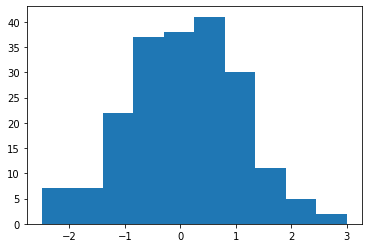

In [43]:
plt.hist(a)

In [44]:
check = (a<0.8)
training = data[check]
testing = data[~check]

In [45]:
len(training), len(testing)

(152, 48)

In [46]:
#lm3 = Sales ~ TV + Radio
lm_training = smf.ols(formula='Sales~TV+Radio',data=data).fit()

In [47]:
lm_training.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 06 Aug 2021   Prob (F-statistic):           4.83e-98
Time:                        15:25:06   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#validacion del modelo con el conjunto de testing

In [49]:
sales_predict = lm_training.predict(testing)
sales_predict

8       3.709379
11     17.256520
14     18.444668
20     18.121392
24      8.140352
30     21.642922
31     11.357918
37     15.625899
41     17.298709
43     13.966923
51      9.319628
53     19.961262
64     16.965709
66      8.987035
67     12.020662
72     10.351138
74     17.309835
86     11.582034
87     15.618724
88     11.755103
90      9.987143
93     21.262772
95     16.333479
96     12.620231
98     24.128426
109    19.663924
111    21.123819
117     6.567163
126    10.590963
131    15.600460
134    11.866030
147    23.260388
148    12.235950
150    18.377596
155     5.289428
156    15.395226
160    14.216501
169    17.921933
173    11.960970
175    24.783526
177    12.174924
178    16.013844
187    17.060279
188    18.620097
189     6.051445
190    12.454978
194    16.463190
199    15.157543
dtype: float64

In [50]:
SSD = sum((testing['Sales']-sales_predict)**2)
SSD

118.13790457861683

In [51]:
RSE = np.sqrt(SSD/(len(testing)-3))
RSE

1.6202736708388825

In [52]:
sales_mean = np.mean(testing['Sales'])
error = RSE/sales_mean
error

0.11129527218126271

## Resumen de las regresiones lineales

In [53]:
from IPython.display import Image

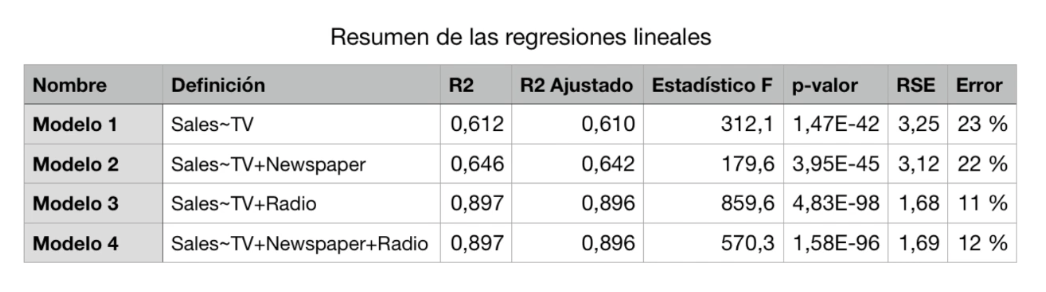

In [54]:
Image(filename='resumen_rl.png')